Opening the correct files

In [1]:
import caesar
import numpy as np
import astropy
from astropy import constants as const
from astropy import units as u
import matplotlib.pyplot as plt
import os

/home/sarah/anaconda3/lib/python3.9/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/sarah/.config/yt/ytrc is deprecated in favor of /home/sarah/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:


#folder_path = '/disk04/rad/sim/m25n256/s50/Groups'

# define input file
infile = '/disk04/rad/sim/m25n256/s50/Groups/m25n256_151.hdf5'

# load in input file
obj = caesar.load(infile)

# define input file
#folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
#filename = 'm25n256_151.hdf5'
    
# load in input file
#obj = caesar.load(os.path.join(folder_path, filename))

# get an array of all bhmdot and bh_fedd
accretion_rates = [i.bhmdot for i in obj.galaxies]
eddington_ratio = [i.bh_fedd for i in obj.galaxies]

# extract data into array
bhmdot0 = np.array(accretion_rates)
bh_fedd = np.array(eddington_ratio)

bhmdot = bhmdot0[bhmdot0 !=0]
bh_fedd = bh_fedd[bhmdot0 !=0]


#print(bhmdot)
#print(bh_fedd)

#probably want to pluck out all the non-zero galaxies (0 ones wont be agn right?)



yt : [INFO     ] 2022-11-24 18:27:07,260 Opening /disk04/rad/sim/m25n256/s50/Groups/m25n256_151.hdf5
yt : [INFO     ] 2022-11-24 18:27:07,306 Found 7567 halos
yt : [INFO     ] 2022-11-24 18:27:07,314 Found 920 galaxies


Finding Bolometric Luminosity (from Habouzit 2022):
* for $f_{edd} > 0.1$ we use $L_{bol} = \frac{\epsilon_r}{1-\epsilon_r}\dot{M_{bh}}c^2$ 
* for $f_{edd} < 0.1$ we use $L_{bol} = (10 f_{edd})\epsilon_r \dot{M_{bh}}c^2$

In [3]:

#effiency
Er = 0.1

#array with shape bhmdot of Lbols using the first equation (fedd > 0.1) for all values
Lbol = ((Er/(1-Er))*bhmdot*(u.M_sun/u.yr)*(const.c**2))
#replacing the indices where fedd < 0.1 with values using the other equation
Lbol[bh_fedd < 0.1] = (10*bh_fedd[bh_fedd < 0.1])*Er*bhmdot[bh_fedd < 0.1]*(u.M_sun/u.yr)*(const.c**2)
#this retains the units
#print('second method:')
#print(Lbol)

#print(Lbol1 == Lbol.value)

Hard X-ray luminosities are computed by applying a bolometric correction, BC (from Hopkins, Richards & Hernquist 2007):

$BC = 10.83 \left( \frac{L_{bol,\odot}}{10^{10} L_{\odot}}\right)^{0.28} + 6.08 \left(\frac{L_{bol,\odot}}{10^{10} L_{\odot}}\right)^{-0.02}$

$\log_{10} L_{2-10keV,\odot} = \log_{10} L_{bol,\odot} - \log_{10} BC$

In [4]:
#print(Lbol.to('L_sun'))

BC = 10.83*((Lbol.to('L_sun')/(10**(10)*u.L_sun))**(0.28)) + 6.08*((Lbol.to('L_sun')/(10**(10)*u.L_sun))**(-0.02))
#print(BC)

In [5]:
#skip this box

#print(const.L_sun)
#converting Lbol from units of m^2 Msun /s^3 to watts
#Lbol_watts = Lbol*const.M_sun/u.M_sun
#Lbol_watts = Lbol_watts.to(u.W)
#converting Lbol from units of watts to in terms of Lsun
#Lbol_sun = Lbol_watts/const.L_sun*u.L_sun
#print(Lbol_sun)

#print(Lbol.to('L_sun'))

#BC = 10.83*(Lbol_sun/(10**(10)*const.L_sun.to(u.L_sun)))**(0.28) + 6.08*(Lbol_sun/(10**(10)*const.L_sun.to(u.L_sun)))**(-0.02)
#print(BC)

In [6]:
#finding the hard x-ray luminosity in terms of Lsun
#have to use just the value of Lbol_sun then add it back on because np.log10 only works on dimensionless quantities
#it then converts to erg/s
Lx = ((10**(np.log10(Lbol.to('L_sun').value)-np.log10(BC)))*u.L_sun).to('erg/s')

print(Lx)
#print(np.min(L_hard[L_hard !=0]))
#print(L_hard.to('erg/s'))
print(Lx.value)

[6.27844974e+39 1.24386242e+40 6.44241989e+40 8.47924480e+40
 2.68807933e+42 4.69367793e+39 2.16788774e+38 1.12032708e+40
 1.43070331e+40 3.59111959e+37 4.61829504e+40 9.90470290e+40
 5.85561803e+39 1.68673734e+39 1.09423812e+40 5.94500410e+38
 4.67688779e+41 4.68707364e+39 3.90372522e+42 1.20298425e+41
 4.61481191e+39 6.36031425e+40 1.10097025e+41 7.51686290e+40
 8.32775724e+40 1.49475165e+41 3.08840192e+40 2.25414618e+41
 5.70845013e+40 9.42949329e+41 2.63214410e+41 3.02031879e+40
 1.84586598e+41 1.24869737e+37 2.09615724e+40 4.38415814e+40
 7.93246894e+38 3.31642463e+40 4.72176664e+41 5.86395723e+41
 4.98540987e+40 2.07600759e+41 1.63380924e+43 6.11375846e+39
 6.93893317e+38 3.38792903e+40 1.21095641e+38 2.13275250e+41
 4.30925984e+41 1.15563026e+41 1.77191348e+41 4.88532180e+39
 2.69667199e+41 1.83042640e+39 7.50794268e+40 4.74612551e+40
 4.52647997e+41 3.27763624e+41 1.50302202e+41 1.17578554e+40
 5.97622916e+41 1.06795308e+42 6.88402475e+39 1.20056787e+38
 1.28577691e+38 1.209457

Now lets plot these hard x-ray luminosities against galaxy stellar mass

Text(0, 0.5, '$\\log(L_X) \\quad [erg s^{-1}]$')

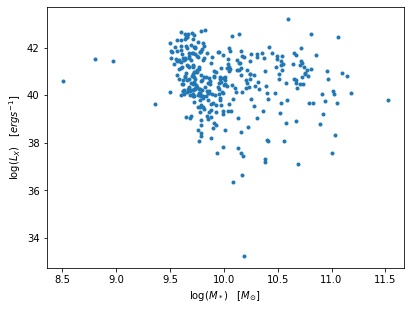

In [7]:
# get an array of all galaxy masses
galaxy_masses = [i.masses['stellar'] for i in obj.galaxies]

# extract data into array
stellar_mass = np.array(galaxy_masses)

plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(stellar_mass[bhmdot0 != 0]), np.log10(Lx.value), '.')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')

In [8]:
mg10 = (stellar_mass[bhmdot0 != 0] > (1e10))
x_lim = np.log10(Lx.value) > 42
comb = mg10 & x_lim

print(np.size(Lx.value[comb]))
print('out of', np.size(Lx.value))

6
out of 338


In [9]:
def get_xray_luminosity(obj):
    ''' 
    Returns the hard x-ray luminosity for every galaxy in the input file
    '''
    # define input file
    #folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
    
    # load in input file
    #obj = caesar.load(os.path.join(folder_path, filename))

    # get an array of all bhmdot and bh_fedd
    accretion_rates = [i.bhmdot for i in obj.galaxies]
    eddington_ratio = [i.bh_fedd for i in obj.galaxies]

    # extract data into array
    bhmdot0 = np.array(accretion_rates)
    bh_fedd = np.array(eddington_ratio)
    
    # removing the 0 accretion rates because they give Lx = 0
    bhmdot = bhmdot0[bhmdot0 !=0]
    bh_fedd = bh_fedd[bhmdot0 !=0]
    
    # finding the bolometric luminosities
    # array with shape bhmdot of Lbols using the first equation (fedd > 0.1) for all values
    Lbol = ((Er/(1-Er))*bhmdot*(u.M_sun/u.yr)*(const.c**2))
    
    # replacing the indices where fedd < 0.1 with values using the other equation
    # this retains the units
    Lbol[bh_fedd < 0.1] = (10*bh_fedd[bh_fedd < 0.1])*Er*bhmdot[bh_fedd < 0.1]*(u.M_sun/u.yr)*(const.c**2)
    
    # finds the bolometric correction
    BC = 10.83*((Lbol.to('L_sun')/(10**(10)*u.L_sun))**(0.28)) + 6.08*((Lbol.to('L_sun')/(10**(10)*u.L_sun))**(-0.02))
    
    # finding the hard x-ray luminosity in terms of Lsun
    # have to use just the value of Lbol_sun then add it back on because np.log10 only works on dimensionless quantities
    # it then converts to erg/s
    Lx_ergs = ((10**(np.log10(Lbol.to('L_sun').value)-np.log10(BC)))*u.L_sun).to('erg/s')
    
    #making it unitless
    Lx = Lx_ergs.value

    
    return Lx

In [10]:
def get_non_zeros(obj):
    # define input file
    #folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
    
    # load in input file
    #obj = caesar.load(os.path.join(folder_path, filename))

    # get an array of all bhmdot and bh_fedd
    accretion_rates = [i.bhmdot for i in obj.galaxies]

    # extract data into array
    bhmdot0 = np.array(accretion_rates)
    
    # removing the 0 accretion rates because they give Lx = 0
    ind = (bhmdot0 !=0 )
    
    return ind

In [11]:
def get_stellar_mass(obj, ind):
    
    # define input file
    #folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
    
    # load in input file
    #obj = caesar.load(os.path.join(folder_path, filename))

    # get an array of all galaxy masses
    galaxy_masses = [i.masses['stellar'] for i in obj.galaxies]

    # extract data into array
    stellar_mass = np.array(galaxy_masses)
    stellar_mass = stellar_mass[ind]
    
    return stellar_mass



The redshift binning used in Aird 2016 are:

* $0.1 < z < 0.5$
* $0.5 < z < 1.0$
* $1.0 < z < 1.5$
* $1.5 < z < 2.0$
* $2.0 < z < 2.5$
* $2.5 < z < 3.0$
* $3.0 < z < 4.0$

and the stellar mass binning is:

* $8.5 < \log(M_* \backslash M_{\odot}) < 9.0$
* $9.0 < \log(M_* \backslash M_{\odot}) < 9.5$
* $9.5 < \log(M_* \backslash M_{\odot}) < 10.0$
* $10.0 < \log(M_* \backslash M_{\odot}) < 10.5$
* $10.5 < \log(M_* \backslash M_{\odot}) < 11.0$
* $11.0 < \log(M_* \backslash M_{\odot}) < 11.5$

In [12]:
# 0 < z < 0.5 filenames
files = ['m25n256_125.hdf5',
'm25n256_126.hdf5',
'm25n256_127.hdf5',
'm25n256_128.hdf5',
'm25n256_129.hdf5',
'm25n256_130.hdf5',
'm25n256_131.hdf5',
'm25n256_132.hdf5',
'm25n256_133.hdf5',
'm25n256_134.hdf5',
'm25n256_135.hdf5',
'm25n256_136.hdf5',
'm25n256_137.hdf5',
'm25n256_138.hdf5',
'm25n256_139.hdf5',
'm25n256_140.hdf5',
'm25n256_141.hdf5',
'm25n256_142.hdf5',
'm25n256_143.hdf5',
'm25n256_144.hdf5',
'm25n256_145.hdf5',
'm25n256_146.hdf5',
'm25n256_147.hdf5',
'm25n256_148.hdf5',
'm25n256_149.hdf5',
'm25n256_150.hdf5']
files.reverse()
# 'm25n256_151.hdf5' is taken out so it can be used as initial conditions

In [13]:
# mini files list for testing
files = ['m25n256_149.hdf5',
'm25n256_150.hdf5']
files.reverse()

In [14]:
# define input file
folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'

Lx_list = []
mass_list = []

#defining the first Lx array
obj = caesar.load(os.path.join(folder_path, 'm25n256_151.hdf5'))
Lx_init = get_xray_luminosity(obj)
ind = get_non_zeros(obj)
sm_init = get_stellar_mass(obj, ind)


for i in files:
    # load in input file
    obj = caesar.load(os.path.join(folder_path, i))
    
    #obtaining the next
    Lx_new = get_xray_luminosity(obj)
    #putting them together
    Lx_array = np.concatenate((Lx_init, Lx_new))
    #defining the beginning of the array for next time
    Lx_init = Lx_array
    
    #same for stellar mass
    ind = get_non_zeros(obj)
    sm_new = get_stellar_mass(obj, ind)
    sm_array = np.concatenate((sm_init, sm_new))
    sm_init = sm_array
   
    
    
    #Lx_list.append(get_xray_luminosity(obj))
    #ind = get_non_zeros(obj)
    #mass_list.append(get_stellar_mass(obj, ind))
#Lx_array = np.asarray(Lx_list, dtype=object)
#mass_array = np.asarray(mass_list, dtype=object)

yt : [INFO     ] 2022-11-24 18:27:09,345 Opening /disk04/rad/sim/m25n256/s50/Groups/m25n256_151.hdf5
yt : [INFO     ] 2022-11-24 18:27:09,367 Found 7567 halos
yt : [INFO     ] 2022-11-24 18:27:09,375 Found 920 galaxies
yt : [INFO     ] 2022-11-24 18:27:09,557 Opening /disk04/rad/sim/m25n256/s50/Groups/m25n256_150.hdf5
yt : [INFO     ] 2022-11-24 18:27:10,320 Found 15890 halos
yt : [INFO     ] 2022-11-24 18:27:10,494 Found 1152 galaxies
yt : [INFO     ] 2022-11-24 18:27:10,745 Opening /disk04/rad/sim/m25n256/s50/Groups/m25n256_149.hdf5
yt : [INFO     ] 2022-11-24 18:27:10,873 Found 15983 halos
yt : [INFO     ] 2022-11-24 18:27:10,998 Found 1145 galaxies


(907,)
(907,)


Text(0, 0.5, '$\\log(L_X) \\quad [erg s^{-1}]$')

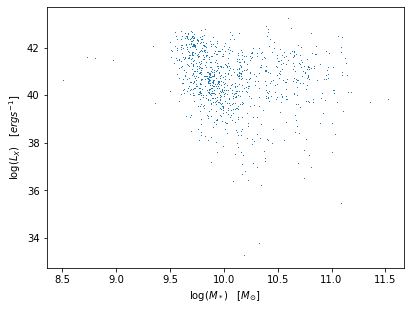

In [15]:
print(np.shape(Lx_array))
print(np.shape(sm_array))

plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(sm_array), np.log10(Lx_array), ',')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')

1.7369914494010058e+33


Text(0, 0.5, '$\\log(L_X) \\quad [erg s^{-1}]$')

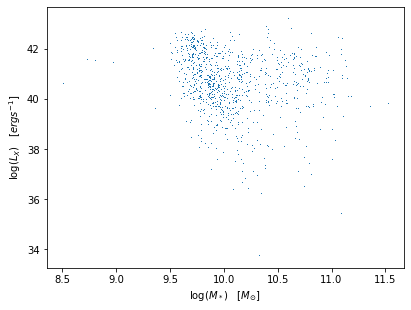

In [16]:
print(np.min(Lx_array))
Lx_cut = Lx_array[Lx_array != np.min(Lx_array)]
sm_cut = sm_array[Lx_array != np.min(Lx_array)]

plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(sm_cut), np.log10(Lx_cut), ',')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')

In [17]:
#print(mass_array)
#print(np.shape(mass_array))

# note to self: currently have an array of arrays?? want a 2D array instead in order to plot
# or actually just a long 1D array would be fine

Lx_0 = Lx_array.flatten()
print(Lx_0)
#print(Lx_array)
#print(np.shape(Lx_array))

# cant have 2D array because theyre all different sizes
# maybe we should just have a 1D array and then if we want to extract different redshifts we can with the original 
# array of arrays
# dont know how to flatten it so maybe astropy tables are the way

[6.27844974e+39 1.24386242e+40 6.44241989e+40 8.47924480e+40
 2.68807933e+42 4.69367793e+39 2.16788774e+38 1.12032708e+40
 1.43070331e+40 3.59111959e+37 4.61829504e+40 9.90470290e+40
 5.85561803e+39 1.68673734e+39 1.09423812e+40 5.94500410e+38
 4.67688779e+41 4.68707364e+39 3.90372522e+42 1.20298425e+41
 4.61481191e+39 6.36031425e+40 1.10097025e+41 7.51686290e+40
 8.32775724e+40 1.49475165e+41 3.08840192e+40 2.25414618e+41
 5.70845013e+40 9.42949329e+41 2.63214410e+41 3.02031879e+40
 1.84586598e+41 1.24869737e+37 2.09615724e+40 4.38415814e+40
 7.93246894e+38 3.31642463e+40 4.72176664e+41 5.86395723e+41
 4.98540987e+40 2.07600759e+41 1.63380924e+43 6.11375846e+39
 6.93893317e+38 3.38792903e+40 1.21095641e+38 2.13275250e+41
 4.30925984e+41 1.15563026e+41 1.77191348e+41 4.88532180e+39
 2.69667199e+41 1.83042640e+39 7.50794268e+40 4.74612551e+40
 4.52647997e+41 3.27763624e+41 1.50302202e+41 1.17578554e+40
 5.97622916e+41 1.06795308e+42 6.88402475e+39 1.20056787e+38
 1.28577691e+38 1.209457

In [18]:
x = np.array([[1,2,3], [4,5,6]])
print(x.flatten('C'))
print(x.flatten('F'))

[1 2 3 4 5 6]
[1 4 2 5 3 6]


In [19]:
files = ['m25n256_151.hdf5']
Lx_list = []
for i in files:
    Lx_list.append(get_xray_luminosity(i))
Lx_array = np.asarray(Lx_list)
print(Lx_array)

AttributeError: 'str' object has no attribute 'galaxies'

In [ ]:
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(mass_array), np.log10(Lx_array), '.')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')

In [ ]:
def get_non_zeros(obj):
    # define input file
    #folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
    
    # load in input file
    #obj = caesar.load(os.path.join(folder_path, filename))

    # get an array of all bhmdot and bh_fedd
    accretion_rates = [i.bhmdot for i in obj.galaxies]

    # extract data into array
    bhmdot0 = np.array(accretion_rates)
    
    # removing the 0 accretion rates because they give Lx = 0
    ind = (bhmdot0 !=0 )
    
    return ind

In [ ]:
def get_stellar_mass(obj, ind):
    
    # define input file
    #folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'
    
    # load in input file
    #obj = caesar.load(os.path.join(folder_path, filename))

    # get an array of all galaxy masses
    galaxy_masses = [i.masses['stellar'] for i in obj.galaxies]

    # extract data into array
    stellar_mass = np.array(galaxy_masses)
    stellar_mass = stellar_mass[ind]
    
    return stellar_mass



In [ ]:
# test of indicies
filename = 'm25n256_151.hdf5'

# define input file
folder_path = '/disk04/rad/sim/m25n256/s50/Groups/'

# load in input file
obj = caesar.load(os.path.join(folder_path, filename))

ind = get_non_zeros(obj)
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(get_stellar_mass(obj, ind)), np.log10(get_xray_luminosity(obj).value), '.')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')

In [ ]:
mass_list = []
for i in files:
    stellar_mass = stellar_mass[]
    mass_list.append(get_stellar_mass(i))
Lx_array = np.asarray(Lx_list)

# note to self: before i can plot the whole redshift bin, i need to take out the corresponding 0 bhmdot values out of all the
# future quantities we want to plot
# maybe I can make another function that gets the non-0 indices of bhmdot separately then use this as an input for getting
# other quantities, then put them all within the same loop

# next change it so the file is only opened once (take obj as the variable in the functions)

In [ ]:
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.plot(np.log10(stellar_mass[Lx_array]), np.log10(Lx[Lx_array].value), '.')
plt.xlabel('$\log(M_*) \quad [M_{\odot}]$')
plt.ylabel('$\log(L_X) \quad [erg s^{-1}]$')